In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import matplotlib.pyplot as plt
from pandas_ml_utils import FeaturesAndLabels
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.2


A very basic plot of a financial data frame can be achieved by calling `ta_plot` with all its defaults

passed item was None


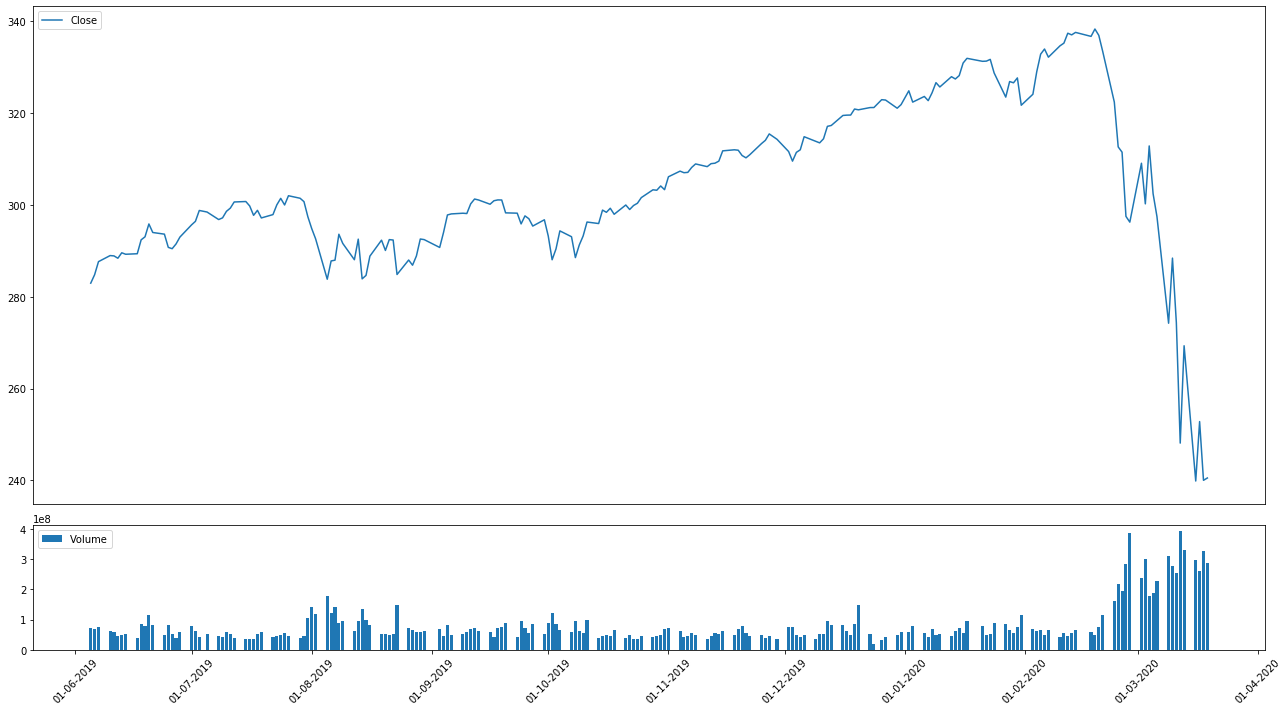

In [2]:
df = pd.read_ts_csv("data/SPY.csv")[-200:]
df.ta.plot()()

If we want to plot all indicators which are available we could do this as well

passed item was None


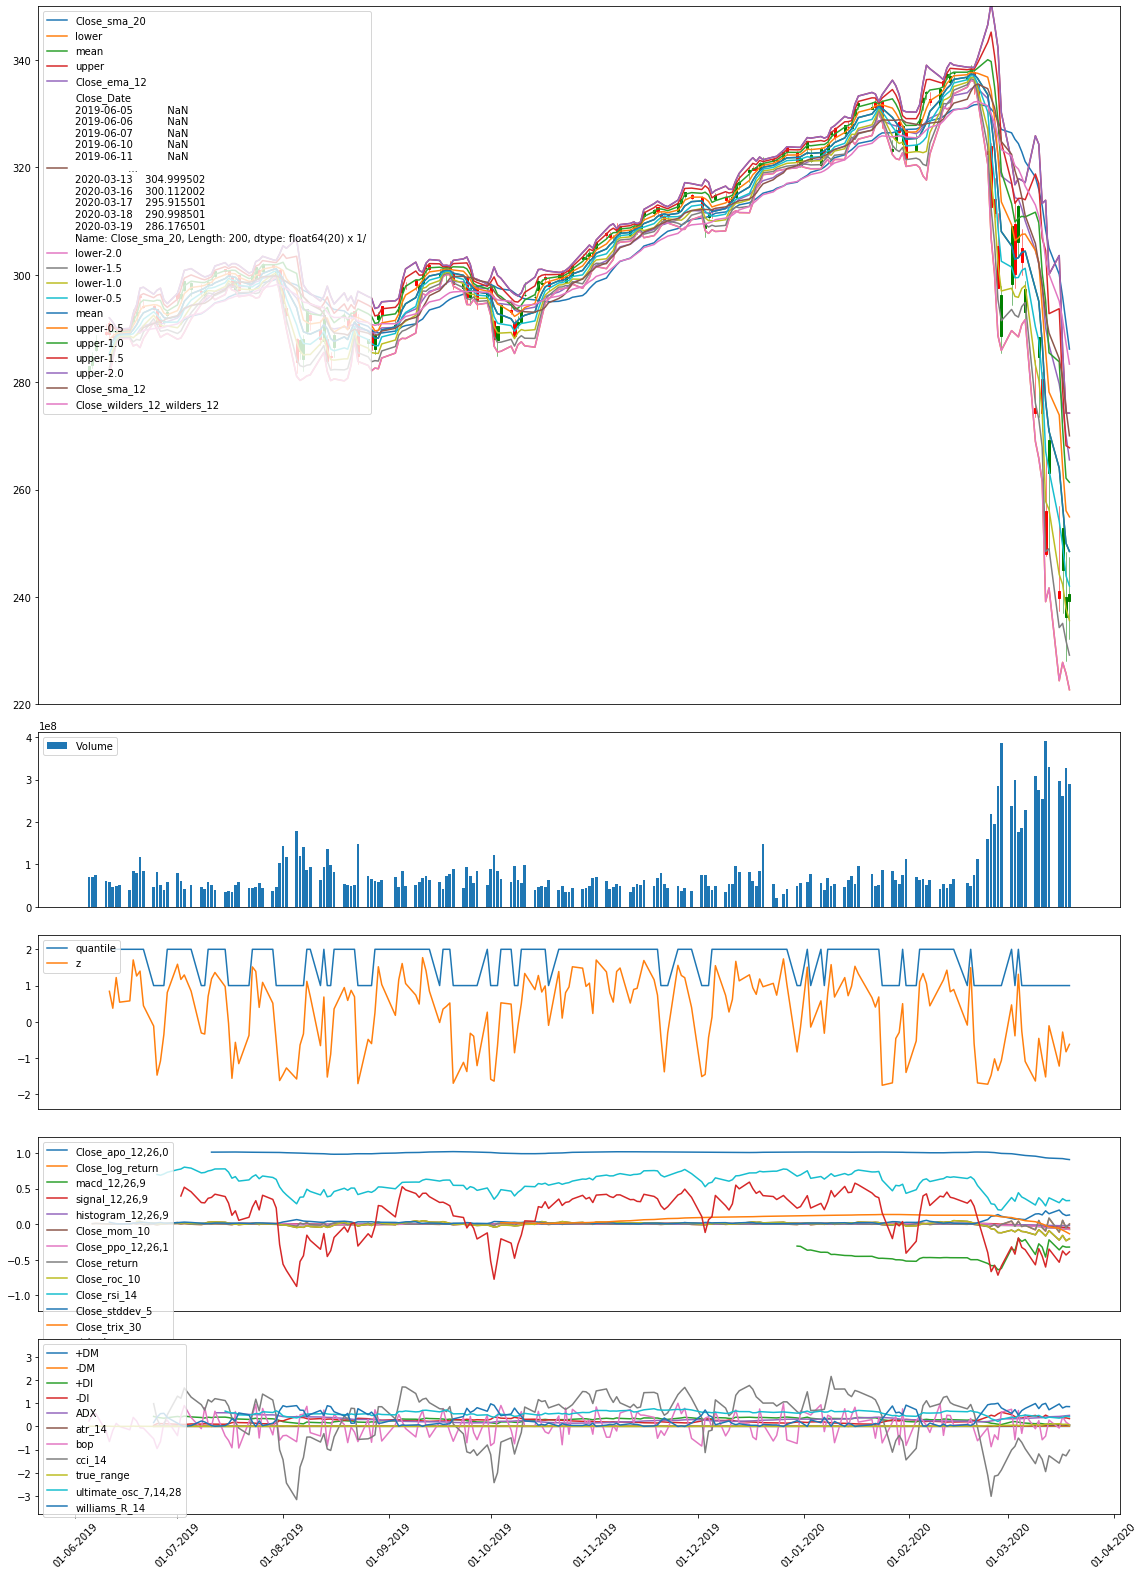

In [3]:
import pandas_ml_quant.analysis.filters as filters
import pandas_ml_quant.analysis.indicators.single_object as simple_indicators
import pandas_ml_quant.analysis.indicators.multi_object as ohlc_indicators


df = pd.read_ts_csv("data/SPY.csv")[-200:]
qp = df.ta.plot(5, 1, figsize=(16, 22))
qp.candlestick()
qp.line(df["Close"].ta.sma(period=20))
qp.bar("Volume", panel=1)

for indicator in dir(filters):
    if indicator.startswith("ta_"):
        x = getattr(df["Close"].ta, indicator[3:])()
        if isinstance(x, pd.DataFrame):
            panel2 = x.max() < x.min().max()
            qp.line(x[x.columns[~panel2]], panel=0)
            if len(x.columns[panel2]) > 0:
                qp.line(x[x.columns[panel2]], panel=2)
        else:
            qp.line(x, panel=0)

for indicator in dir(simple_indicators):
    if indicator.startswith("ta_"):
        x = getattr(df["Close"].ta, indicator[3:])()
        qp.line(x, panel=3)

for indicator in dir(ohlc_indicators):
    if indicator.startswith("ta_"):
        x = getattr(df.ta, indicator[3:])()
        qp.line(x, panel=4)

qp.set_scale(0, 220, 350)
qp.with_symetric_scale(2, 3, 4)
qp.with_legend()

We can also plot some more fancy stuff like a Gramian Anglar Field and animate those plots over time

In [4]:
df["Close"].ta.rnn(24).ta.gaf()[-20:].ta.plot().plot_matrix_animation('Close_gaf')

But we can also explore our feature space which is not only related to financial data. We just pass a `FeaturesAndLabels` object which is the main data definition needed for any statistical model ind the pandas-ml-utils space. 

passed item was None
passed item was None


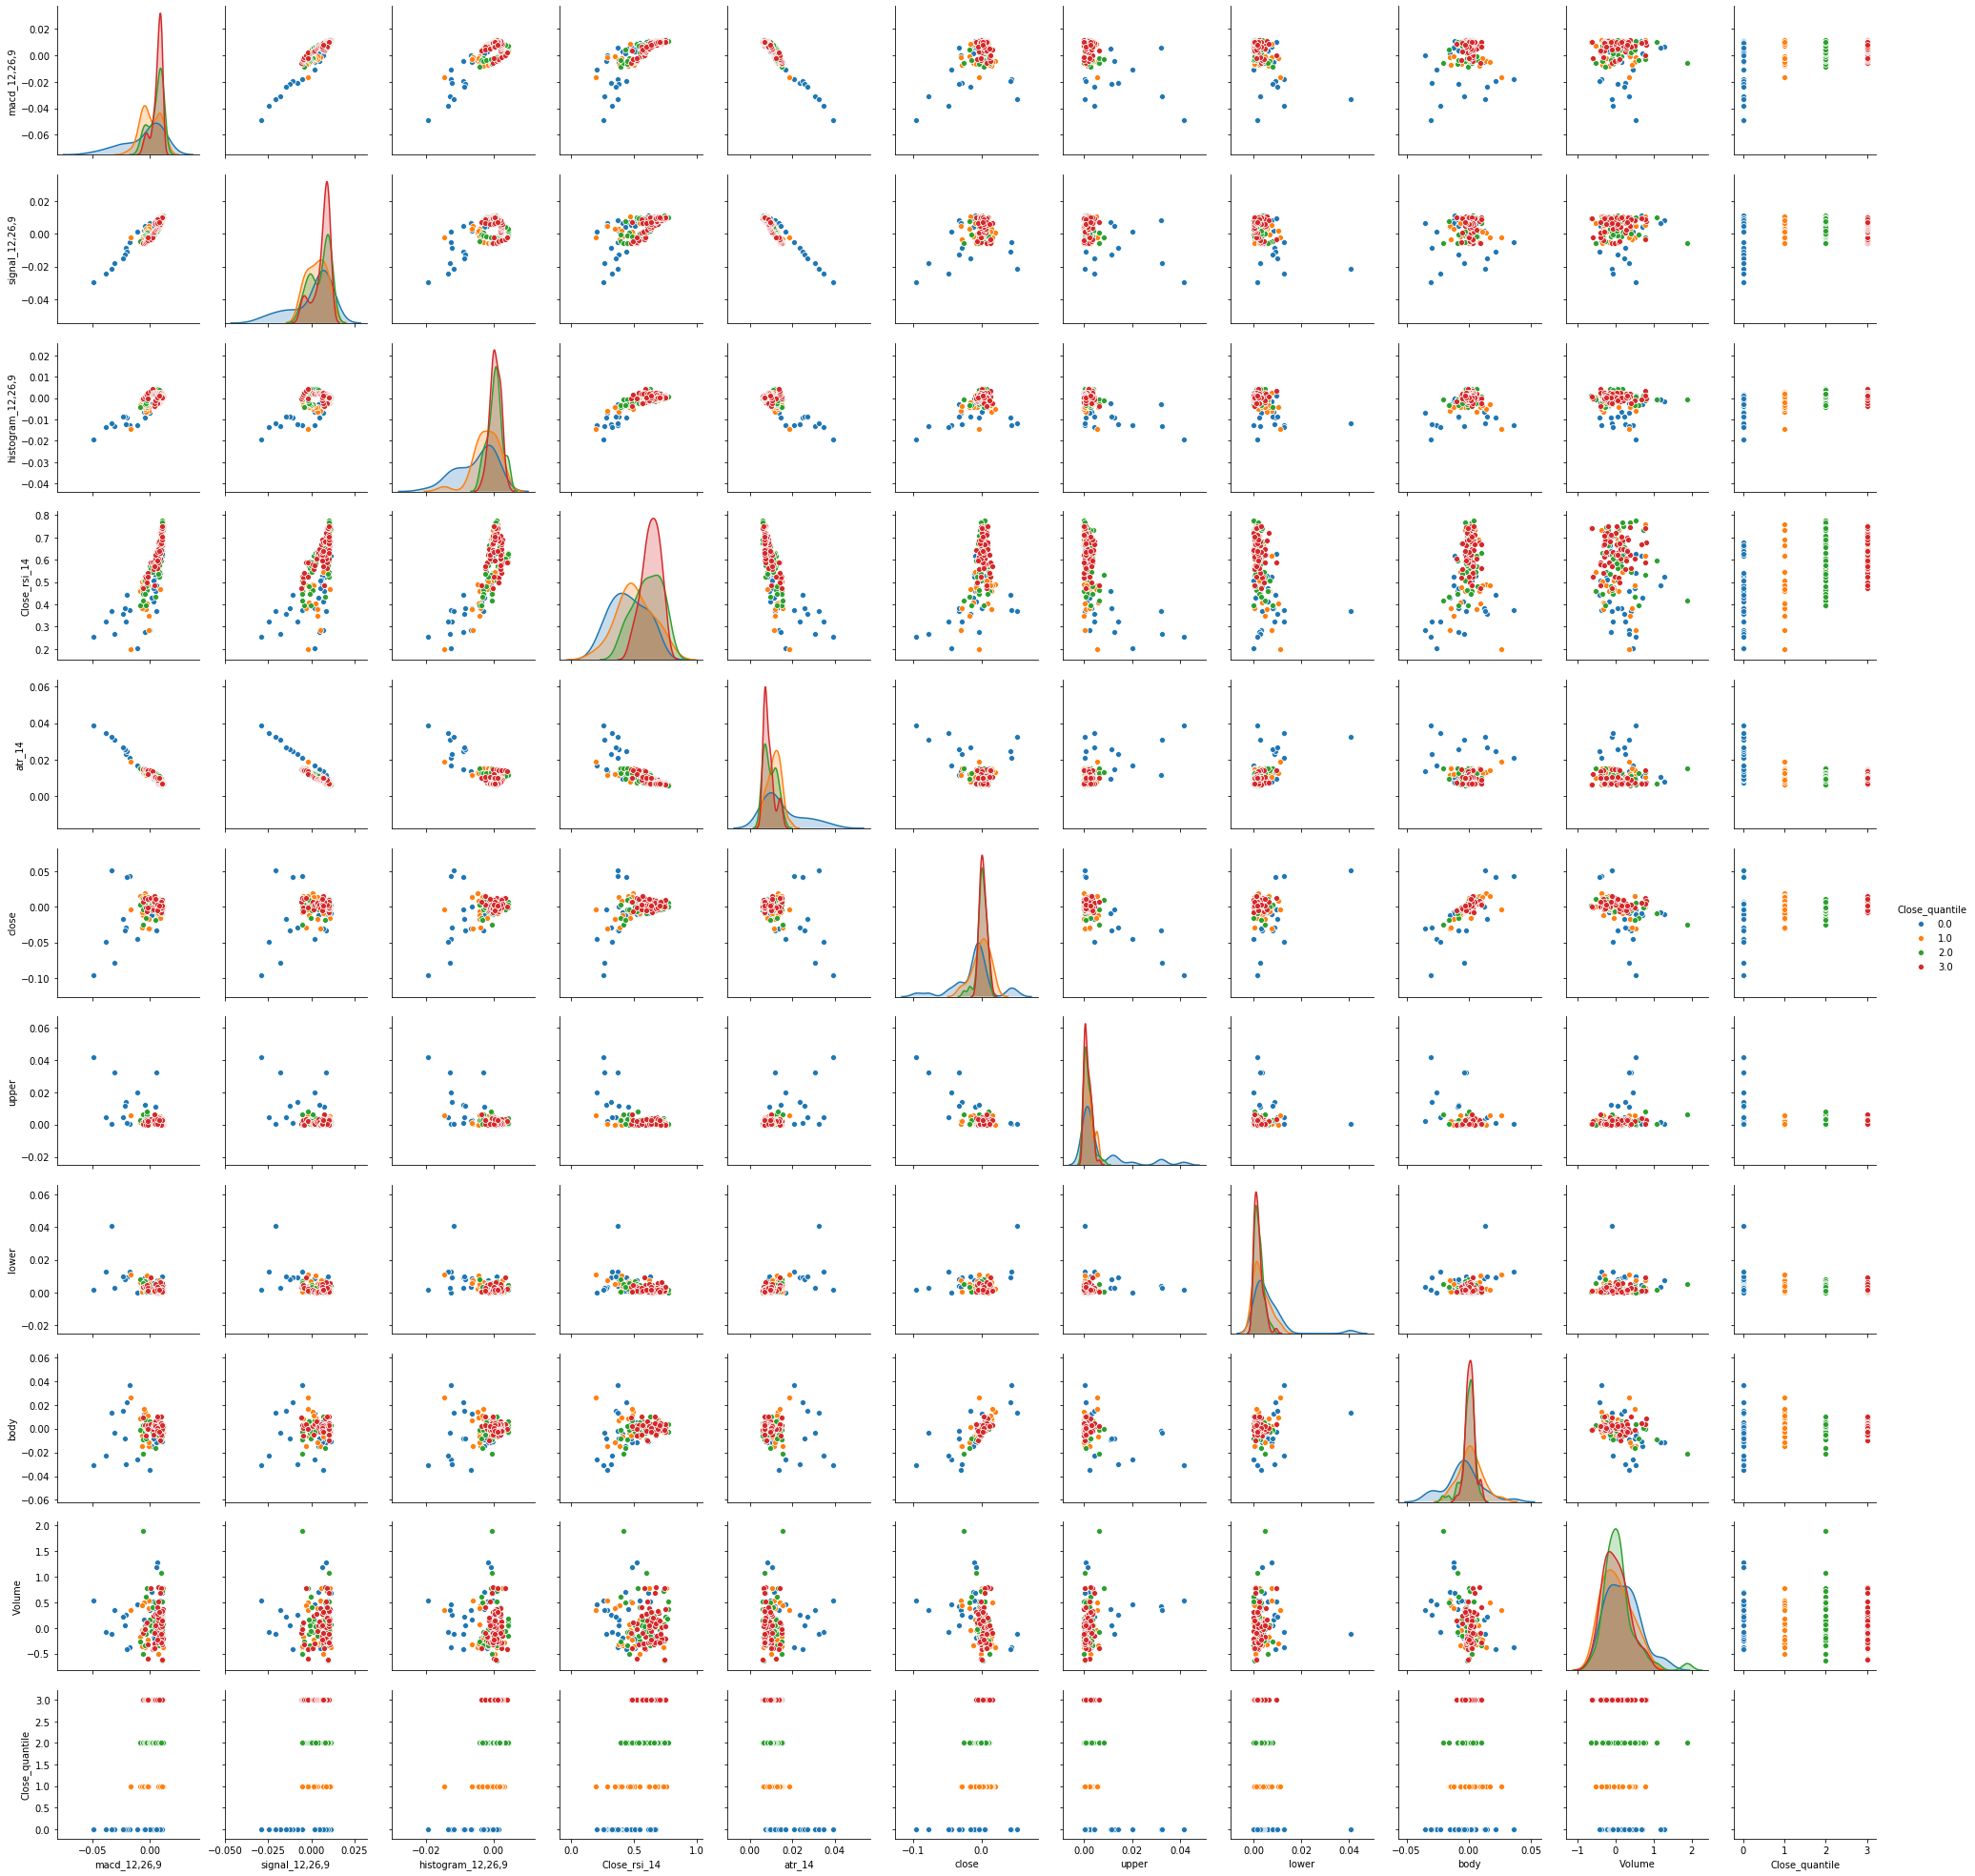

In [5]:
df.model.plot_features(
    FeaturesAndLabels(
        features=[
            lambda df: df["Close"].ta.macd(),
            lambda df: df["Close"].ta.rsi(),
            lambda df: df.ta.atr(),
            lambda df: df.ta.candles_as_culb(relative_close=True),
        ],
        labels=[
            lambda df: df["Close"].ta.future_bband_quantile(include_mean=True)
        ]
    )
)
